<a href="https://colab.research.google.com/github/MFreeze1/Housing-O-Reilly/blob/readme-edits/housing_csv_O'Reillly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving housing.csv to housing.csv


In [ ]:
import io

df = pd.read_csv(io.BytesIO(uploaded['housing.csv']))

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200.0,NEAR BAY


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(5), int64(4), object(1)
memory usage: 1.6+ MB


In [ ]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
data = df.copy()
data["ocean_proximity"] = data["ocean_proximity"].map({'<1H OCEAN': 0, 'INLAND': 1, 'NEAR OCEAN': 2, 'NEAR BAY': 3, 'ISLAND': 4})
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600.0,3
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500.0,3
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100.0,3
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300.0,3
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200.0,3


In [ ]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,0.908769
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,1.004549
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,1.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,1.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,4.000000


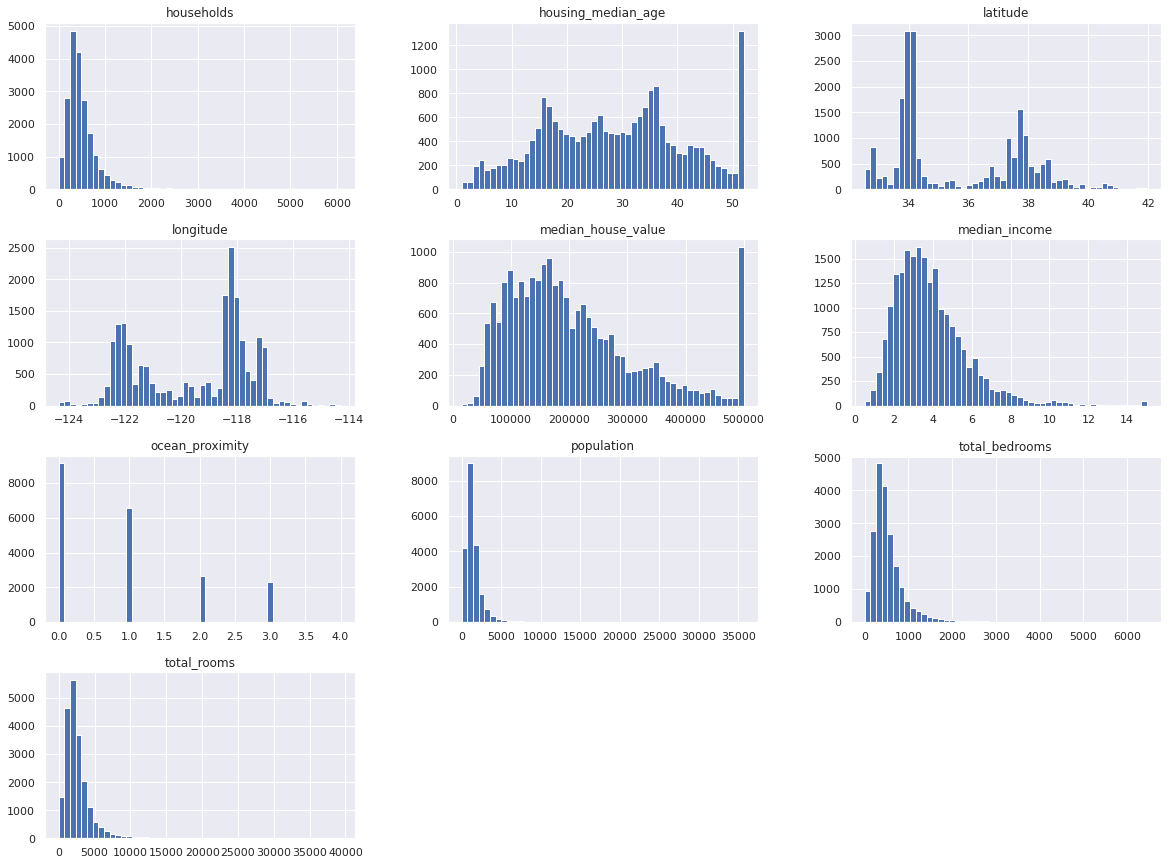

In [ ]:
%matplotlib inline
data.hist(bins = 50, figsize = (20,15))
plt.show()

In [ ]:
#Creating a Test DataSet

from sklearn.model_selection import train_test_split

t